In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
funcToAvg = dict()
totLoopTime = 0
with open('logs.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        # func , .. , .. , "avg", "=", num, "micros0"
        # OR
        # func, "avg", "=", num, "micros0"
        sline = line.split()
        n = len(sline)
        assert "avg" not in line
        if "ONE LOOP" in line:
            totLoopTime += float(sline[n-2])
            continue
        if "tot" in line:
            func = ""
            if "::" in sline[n-5]:
                func = sline[n-5]
            else:
                assert "::" in sline[n-7]
                func = sline[n-7] + " " + sline[n-6] + " " + sline[n-5]
            funcToAvg[func] = funcToAvg.get(func,0) + float(sline[n-2])

In [3]:
ss = pd.Series(funcToAvg)
ss = ss.reindex(index=[
    "folly::EventBase::loopBody() PART 2",
    "folly::EventBase::loopBody() PART 3",
    "folly::EventBase::loopBody() PART 4",
    "folly::EventBase::runLoopCallbacks() PART 1",
    # "folly::EventBase::runLoopCallbacks() PART 2",
    "quic::FunctionLooper::runLoopCallback()",
    "QuicTransportBase::notifyPendingWriteOnStream()",
    "tperf::ServerStreamHandler::onStreamWriteReady() PART 1",
    "tperf::ServerStreamHandler::onStreamWriteReady() PART 2",
    "quic::QuicTransportBase::writeChain() PART 1",
    "quic::QuicTransportBase::writeChain() PART 2",
    "quic::writeDataToQuicStream()",
    "quic::FunctionLooper::commonLoopBody() PART 1",
    "quic::FunctionLooper::commonLoopBody() PART 2",
    "quic::QuicTransportBase::pacedWriteDataToSocket()",
    "quic::QuicTransportBase::writeSocketDataAndCatch() PART 1",
    "quic::QuicTransportBase::writeSocketDataAndCatch() PART 2",
    "quic::QuicTransportBase::writeSocketData() PART 1",
    "quic::QuicTransportBase::writeSocketData() PART 2",
    "quic::QuicTransportBase::writeSocketData() PART 3",
    "quic::QuicServerTransport::writeData()",
    "(anon)::writeQuicDataToSocketImpl()",
    "quic::writeConnectionDataToSocket() PART 1",
    "quic::writeConnectionDataToSocket() PART 2",
    "quic::writeConnectionDataToSocket() PART 3",
    "quic::writeConnectionDataToSocket() PART 4",
    "(anon)::continuousMemoryBuildScheduleEncrypt() PART 1",
    "(anon)::continuousMemoryBuildScheduleEncrypt() PART 2",
    "(anon)::continuousMemoryBuildScheduleEncrypt() PART 3",
    "(anon)::continuousMemoryBuildScheduleEncrypt() PART 4",
    "(anon)::continuousMemoryBuildScheduleEncrypt() PART 5",
    "quic::IOBufQuicBatch::write()",
    "quic::IOBufQuicBatch::flush() PART 1",
    "quic::IOBufQuicBatch::flush() PART 2",
    "quic::IOBufQuicBatch::flushInternal() PART 1",
    "quic::IOBufQuicBatch::flushInternal() PART 2",
    "quic::GSOInplacePacketBatchWriter::write() PART 1",
    "quic::GSOInplacePacketBatchWriter::write() PART 2",
    "folly::AsyncUDPSocket::writeGSO()",
    "folly::AsyncUDPSocket::writev()",
    "folly::AsyncUDPSocket::sendmsg()"
])
assert len(ss.index) == len(funcToAvg) 
perc = ss / ss.sum() * 100
cf = perc.cumsum()
labels = perc.index.tolist()

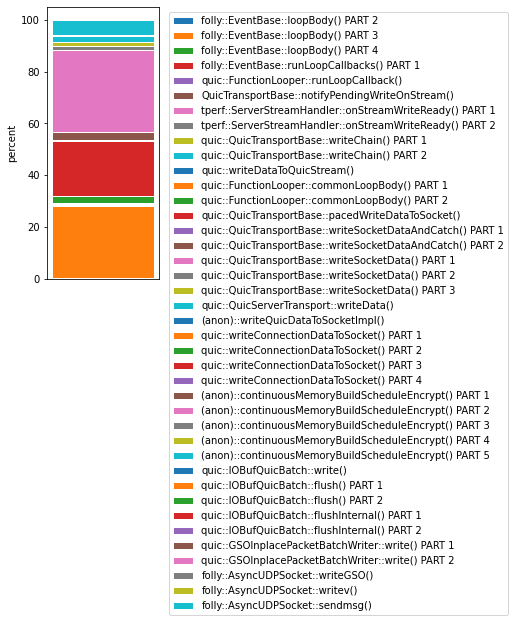

In [4]:
plt.figure(figsize=(2, 5))

plt.bar(0, perc[0], edgecolor='white', width=0.2)

# loop through each, using for 'bottom' the cumulative frequency
for i in range(1, len(perc)):
    plt.bar(0, perc[i], bottom=cf[i-1], edgecolor='white', width=0.2)

# the 'bbox_to_anchor' places the legend outside the bars
plt.legend(labels, bbox_to_anchor=(1.05, 1))
plt.ylabel('percent')

# to switch off the horizontal axis
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.show()

# Absolute Total Times

In [5]:
ss

folly::EventBase::loopBody() PART 2                            1181.0
folly::EventBase::loopBody() PART 3                          563654.0
folly::EventBase::loopBody() PART 4                            2622.0
folly::EventBase::runLoopCallbacks() PART 1                    1252.0
quic::FunctionLooper::runLoopCallback()                           0.0
QuicTransportBase::notifyPendingWriteOnStream()                   1.0
tperf::ServerStreamHandler::onStreamWriteReady() PART 1          11.0
tperf::ServerStreamHandler::onStreamWriteReady() PART 2           0.0
quic::QuicTransportBase::writeChain() PART 1                      1.0
quic::QuicTransportBase::writeChain() PART 2                      0.0
quic::writeDataToQuicStream()                                     2.0
quic::FunctionLooper::commonLoopBody() PART 1                     0.0
quic::FunctionLooper::commonLoopBody() PART 2                     0.0
quic::QuicTransportBase::pacedWriteDataToSocket()              1108.0
quic::QuicTransportB

# Fraction of Total Time

In [6]:
perc

folly::EventBase::loopBody() PART 2                           0.058428
folly::EventBase::loopBody() PART 3                          27.886048
folly::EventBase::loopBody() PART 4                           0.129720
folly::EventBase::runLoopCallbacks() PART 1                   0.061941
quic::FunctionLooper::runLoopCallback()                       0.000000
QuicTransportBase::notifyPendingWriteOnStream()               0.000049
tperf::ServerStreamHandler::onStreamWriteReady() PART 1       0.000544
tperf::ServerStreamHandler::onStreamWriteReady() PART 2       0.000000
quic::QuicTransportBase::writeChain() PART 1                  0.000049
quic::QuicTransportBase::writeChain() PART 2                  0.000000
quic::writeDataToQuicStream()                                 0.000099
quic::FunctionLooper::commonLoopBody() PART 1                 0.000000
quic::FunctionLooper::commonLoopBody() PART 2                 0.000000
quic::QuicTransportBase::pacedWriteDataToSocket()             0.054817
quic::

In [7]:
print("Total loop time: " + str(totLoopTime) + " us")
print("Accounted time: " + str(ss.sum()) + " us")

Total loop time: 2697097.0 us
Accounted time: 2021276.0 us
